# EVN

In [1]:
import numpy as np
import matplotlib.pyplot as plt

import tensorflow as tf

# 단어 긍정(2), 중립(1), 부정(0) 분류 프로젝트

## 데이터

In [2]:
# 입력 문장
sentences = [
    '나는 오늘 기분이 좋아',
    '나는 오늘 우울해'
]

# 출력 정답
labels = [[1, 1, 1, 2],
          [1, 1, 0]]  # 긍정(2), 중립(1), 부정(0)

# 정답 dic
id_to_label = {0: '부정', 1: '중립', 2: '긍정'}

## Vocabulary

In [3]:
# 각 문장을 띄어쓰기 단위로 분할
words = []
for sentence in sentences:
    words.extend(sentence.split())
words

['나는', '오늘', '기분이', '좋아', '나는', '오늘', '우울해']

In [4]:
# 중복 단어 제거
words = list(dict.fromkeys(words))
words

['나는', '오늘', '기분이', '좋아', '우울해']

In [5]:
# 각 단어별 고유한 번호 부여
word_to_id = {'[PAD]': 0, '[UNK]': 1}
for word in words:
    word_to_id[word] = len(word_to_id)
word_to_id

{'[PAD]': 0, '[UNK]': 1, '기분이': 4, '나는': 2, '오늘': 3, '우울해': 6, '좋아': 5}

In [6]:
# 각 숫자별 단어 부여
id_to_word = {_id:word for word, _id in word_to_id.items()}
id_to_word

{0: '[PAD]', 1: '[UNK]', 2: '나는', 3: '오늘', 4: '기분이', 5: '좋아', 6: '우울해'}

## 모델 학습용 데이터 생성

In [7]:
# 학습용 입력 데이터 생성
train_inputs = []
for sentence in sentences:
    train_inputs.append([word_to_id[word] for word in sentence.split()])
train_inputs

[[2, 3, 4, 5], [2, 3, 6]]

In [8]:
# train label은 labels를 그래도 사용
train_labels = labels
train_labels

[[1, 1, 1, 2], [1, 1, 0]]

In [9]:
# train inputs을 numpy array로 변환
np.array(train_inputs)

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:2: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  


array([list([2, 3, 4, 5]), list([2, 3, 6])], dtype=object)

In [10]:
# train labels을 numpy array로 변환
np.array(train_labels)

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:2: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  


array([list([1, 1, 1, 2]), list([1, 1, 0])], dtype=object)

In [11]:
# 문장의 길이를 모두 동일하게 변경 (최대길이 4)
for row in train_inputs:
    row += [0] * (4 - len(row))
train_inputs

[[2, 3, 4, 5], [2, 3, 6, 0]]

In [12]:
# train inputs을 numpy array로 변환
train_inputs = np.array(train_inputs)
train_inputs

array([[2, 3, 4, 5],
       [2, 3, 6, 0]])

In [13]:
# 정답 길이를 모두 동일하게 변경 (최대길이 4)
for row in train_labels:
    row += [1] * (4 - len(row))
train_labels

[[1, 1, 1, 2], [1, 1, 0, 1]]

In [14]:
# 학습용 정답을 numpy array로 변환
train_labels = np.array(train_labels)
train_labels

array([[1, 1, 1, 2],
       [1, 1, 0, 1]])

## 모델링

In [15]:
# 입력 단어를 vector로 변환
embedding = tf.keras.layers.Embedding(len(word_to_id), 8)
hidden = embedding(train_inputs)
hidden

<tf.Tensor: shape=(2, 4, 8), dtype=float32, numpy=
array([[[-0.04800937,  0.03933741,  0.0365727 , -0.02174415,
         -0.00282722, -0.04632704,  0.04153247, -0.01138527],
        [-0.0264183 ,  0.00209554,  0.03272033, -0.00244776,
          0.04773093, -0.0414207 , -0.04480568, -0.02639085],
        [-0.02456715, -0.02691122, -0.04118692, -0.01664939,
          0.02295676, -0.0234491 ,  0.04787463, -0.02608814],
        [-0.02818636,  0.01385135,  0.03555342,  0.04277427,
          0.02680499, -0.01394784,  0.01671681, -0.01973931]],

       [[-0.04800937,  0.03933741,  0.0365727 , -0.02174415,
         -0.00282722, -0.04632704,  0.04153247, -0.01138527],
        [-0.0264183 ,  0.00209554,  0.03272033, -0.00244776,
          0.04773093, -0.0414207 , -0.04480568, -0.02639085],
        [-0.02885746, -0.01886793, -0.04923371, -0.03048855,
         -0.03724971,  0.02564975, -0.00079206,  0.0387977 ],
        [ 0.0032206 , -0.01934782, -0.02590783, -0.02990241,
          0.04475189,  0.

In [16]:
# embedding weight
weight = embedding.get_weights()[0]
weight

array([[ 0.0032206 , -0.01934782, -0.02590783, -0.02990241,  0.04475189,
         0.01708344,  0.04780597,  0.00985916],
       [-0.03106566, -0.02807477,  0.02519805, -0.03729252,  0.03974246,
         0.02798263, -0.00289103, -0.01176031],
       [-0.04800937,  0.03933741,  0.0365727 , -0.02174415, -0.00282722,
        -0.04632704,  0.04153247, -0.01138527],
       [-0.0264183 ,  0.00209554,  0.03272033, -0.00244776,  0.04773093,
        -0.0414207 , -0.04480568, -0.02639085],
       [-0.02456715, -0.02691122, -0.04118692, -0.01664939,  0.02295676,
        -0.0234491 ,  0.04787463, -0.02608814],
       [-0.02818636,  0.01385135,  0.03555342,  0.04277427,  0.02680499,
        -0.01394784,  0.01671681, -0.01973931],
       [-0.02885746, -0.01886793, -0.04923371, -0.03048855, -0.03724971,
         0.02564975, -0.00079206,  0.0387977 ]], dtype=float32)

In [17]:
# numpy를 이용해서 직접 조회 (두 결과값 비교)
weight[train_inputs], hidden

(array([[[-0.04800937,  0.03933741,  0.0365727 , -0.02174415,
          -0.00282722, -0.04632704,  0.04153247, -0.01138527],
         [-0.0264183 ,  0.00209554,  0.03272033, -0.00244776,
           0.04773093, -0.0414207 , -0.04480568, -0.02639085],
         [-0.02456715, -0.02691122, -0.04118692, -0.01664939,
           0.02295676, -0.0234491 ,  0.04787463, -0.02608814],
         [-0.02818636,  0.01385135,  0.03555342,  0.04277427,
           0.02680499, -0.01394784,  0.01671681, -0.01973931]],
 
        [[-0.04800937,  0.03933741,  0.0365727 , -0.02174415,
          -0.00282722, -0.04632704,  0.04153247, -0.01138527],
         [-0.0264183 ,  0.00209554,  0.03272033, -0.00244776,
           0.04773093, -0.0414207 , -0.04480568, -0.02639085],
         [-0.02885746, -0.01886793, -0.04923371, -0.03048855,
          -0.03724971,  0.02564975, -0.00079206,  0.0387977 ],
         [ 0.0032206 , -0.01934782, -0.02590783, -0.02990241,
           0.04475189,  0.01708344,  0.04780597,  0.00985916

In [18]:
# 단어의 vector를 이용해서 긍정(2), 부정(0), 중립(1) 확률값 예측
linear = tf.keras.layers.Dense(3, activation=tf.nn.softmax)
outputs = linear(hidden)
outputs

<tf.Tensor: shape=(2, 4, 3), dtype=float32, numpy=
array([[[0.31971812, 0.34218216, 0.33809966],
        [0.32150626, 0.33476642, 0.34372732],
        [0.3340001 , 0.3337416 , 0.33225822],
        [0.32054338, 0.32274365, 0.35671294]],

       [[0.31971812, 0.34218216, 0.33809966],
        [0.32150626, 0.33476642, 0.34372732],
        [0.34531006, 0.33461484, 0.32007504],
        [0.33667365, 0.33350033, 0.32982597]]], dtype=float32)>

In [19]:
# dense의 wieght, bias
weight, bias = linear.get_weights()
weight, bias

(array([[ 0.53229743,  0.5529029 , -0.32125854],
        [-0.5636516 , -0.05896288,  0.66829664],
        [-0.16442633,  0.16497606, -0.05548364],
        [-0.03756589, -0.58237654,  0.73063594],
        [-0.0301137 ,  0.02602237,  0.7378138 ],
        [-0.13057244, -0.6292717 ,  0.42588133],
        [ 0.4395159 ,  0.4441076 ,  0.36945885],
        [ 0.59815854,  0.4215477 , -0.28366622]], dtype=float32),
 array([0., 0., 0.], dtype=float32))

In [20]:
# numpy를 이용한 xW + b
logits = np.matmul(hidden, weight) + bias
logits

array([[[-0.03534639,  0.0325571 ,  0.02055461],
        [-0.05203936, -0.01162333,  0.01479226],
        [ 0.01729649,  0.01652221,  0.0120676 ],
        [-0.03370956, -0.02686878,  0.07320421]],

       [[-0.03534639,  0.0325571 ,  0.02055461],
        [-0.05203936, -0.01162333,  0.01479226],
        [ 0.02514647, -0.0063161 , -0.05074087],
        [ 0.04133354,  0.03186329,  0.02078466]]], dtype=float32)

In [21]:
# softmax 계산을 위한 준비 exp(x') / sum(exp(x))
numerator = np.exp(logits)
denominator = np.sum(numerator, axis=2, keepdims=True)
numerator, denominator

(array([[[0.96527106, 1.033093  , 1.0207672 ],
         [0.9492915 , 0.98844403, 1.0149022 ],
         [1.017447  , 1.0166594 , 1.0121408 ],
         [0.96685225, 0.9734889 , 1.0759501 ]],
 
        [[0.96527106, 1.033093  , 1.0207672 ],
         [0.9492915 , 0.98844403, 1.0149022 ],
         [1.0254654 , 0.9937038 , 0.95052487],
         [1.0421996 , 1.0323764 , 1.0210022 ]]], dtype=float32),
 array([[[3.0191312],
         [2.9526377],
         [3.046247 ],
         [3.0162914]],
 
        [[3.0191312],
         [2.9526377],
         [2.969694 ],
         [3.0955782]]], dtype=float32))

In [22]:
# 두 결과값 비교
probs = numerator / denominator
probs, outputs

(array([[[0.31971815, 0.34218222, 0.33809966],
         [0.32150626, 0.33476645, 0.34372732],
         [0.33400017, 0.3337416 , 0.33225825],
         [0.32054338, 0.32274365, 0.35671294]],
 
        [[0.31971815, 0.34218222, 0.33809966],
         [0.32150626, 0.33476645, 0.34372732],
         [0.34531012, 0.33461487, 0.32007504],
         [0.33667365, 0.33350036, 0.329826  ]]], dtype=float32),
 <tf.Tensor: shape=(2, 4, 3), dtype=float32, numpy=
 array([[[0.31971812, 0.34218216, 0.33809966],
         [0.32150626, 0.33476642, 0.34372732],
         [0.3340001 , 0.3337416 , 0.33225822],
         [0.32054338, 0.32274365, 0.35671294]],
 
        [[0.31971812, 0.34218216, 0.33809966],
         [0.32150626, 0.33476642, 0.34372732],
         [0.34531006, 0.33461484, 0.32007504],
         [0.33667365, 0.33350033, 0.32982597]]], dtype=float32)>)

In [27]:
def build_model(n_vocab, d_model, n_seq, n_out):
    """
    동작만 하는 간단한 모델
    :param n_vocab: vocabulary 단어 수
    :param d_model: 단어를 의미하는 벡터의 차원 수
    :param n_seq: 문장길이 (단어 수)
    :param n_out: 예측할 class 개수
    """
    inputs = tf.keras.layers.Input((n_seq,))  # (bs, n_seq)
    # 입력 단어를 vector로 변환
    embedding = tf.keras.layers.Embedding(n_vocab, d_model)
    hidden = embedding(inputs)  # (bs, n_seq, d_model)
    #######################################
    # 여기에 CNN 및 RNN 모델을 추가해 보세요.
    # CNN
    conv_1 = tf.keras.layers.Conv1D(filters=128, kernel_size =3, padding='causal')
    hidden = conv_1(hidden)

    # RNN
    # rnn_1 = tf.keras.layers.Bidirectional(tf.keras.layers.SimpleRNN(units=128, return_sequences=True))
    # hidden = rnn_1(hidden

    #######################################
    # 단어의 vector를 이용해서 정답 확률값 예측
    linear = tf.keras.layers.Dense(n_out, activation=tf.nn.softmax)
    outputs = linear(hidden)  # (bs, n_seq, n_out)
    # 학습할 모델 선언
    model = tf.keras.Model(inputs=inputs, outputs=outputs)
    return model

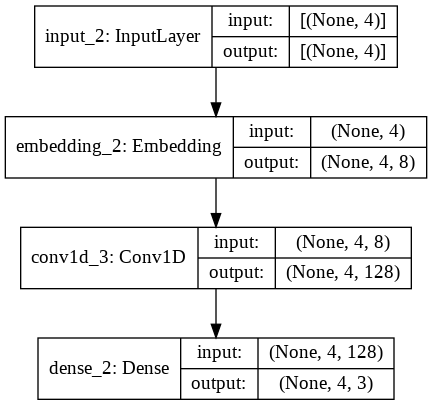

In [28]:
# 모델 생성
model = build_model(len(word_to_id), 8, 4, 3)
# 모델 내용 그래프 출력
tf.keras.utils.plot_model(model, 'model.png', show_shapes=True)

## 학습

In [29]:
# 모델 loss, optimizer, metric 정의
model.compile(loss='sparse_categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

In [30]:
# 모델 학습
history = model.fit(train_inputs, train_labels, epochs=100, batch_size=16)

Epoch 1/100
1/1 [==============================] - 1s 595ms/step - loss: 1.0984 - accuracy: 0.3750
Epoch 2/100
1/1 [==============================] - 0s 8ms/step - loss: 1.0879 - accuracy: 0.7500
Epoch 3/100
1/1 [==============================] - 0s 5ms/step - loss: 1.0774 - accuracy: 0.7500
Epoch 4/100
1/1 [==============================] - 0s 5ms/step - loss: 1.0670 - accuracy: 0.7500
Epoch 5/100
1/1 [==============================] - 0s 4ms/step - loss: 1.0566 - accuracy: 0.7500
Epoch 6/100
1/1 [==============================] - 0s 4ms/step - loss: 1.0461 - accuracy: 0.7500
Epoch 7/100
1/1 [==============================] - 0s 4ms/step - loss: 1.0355 - accuracy: 0.7500
Epoch 8/100
1/1 [==============================] - 0s 4ms/step - loss: 1.0249 - accuracy: 0.7500
Epoch 9/100
1/1 [==============================] - 0s 4ms/step - loss: 1.0140 - accuracy: 0.7500
Epoch 10/100
1/1 [==============================] - 0s 4ms/step - loss: 1.0030 - accuracy: 0.7500
Epoch 11/100
1/1 [=========

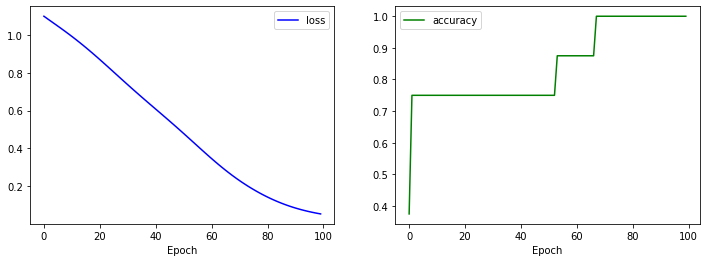

In [31]:
plt.figure(figsize=(12, 4))

plt.subplot(1, 2, 1)
plt.plot(history.history['loss'], 'b-', label='loss')
plt.xlabel('Epoch')
plt.legend()

plt.subplot(1, 2, 2)
plt.plot(history.history['accuracy'], 'g-', label='accuracy')
plt.xlabel('Epoch')
plt.legend()

plt.show()

## 평가

In [32]:
# 모델 평가
model.evaluate(train_inputs, train_labels)

1/1 [==============================] - 0s 172ms/step - loss: 0.0518 - accuracy: 1.0000


[0.05179218202829361, 1.0]

## 예측

In [33]:
# 추론할 입력
string = '나는 기분이 우울해'

In [34]:
# 입력을 숫자로 변경
infer_input = [word_to_id[word] for word in string.split()]
infer_input

[2, 4, 6]

In [35]:
# 문장의 길이를 모두 동일하게 변경 (최대길이 4)
infer_input += [0] * (4 - len(infer_input))
infer_input

[2, 4, 6, 0]

In [36]:
# numpy array 변환 (batch size 1 추가)
infer_inputs = np.array([infer_input])
infer_inputs

array([[2, 4, 6, 0]])

In [37]:
# 긍정/부정 추론
y_preds = model.predict(infer_inputs)
y_preds

array([[[0.00664415, 0.9865383 , 0.00681749],
        [0.01228302, 0.97007275, 0.01764426],
        [0.57447773, 0.03447368, 0.3910485 ],
        [0.01526641, 0.980078  , 0.00465564]]], dtype=float32)

In [38]:
# 확률의 max 값을 추론 값으로 결정
y_pred_class = np.argmax(y_preds, axis=2)
y_pred_class

array([[1, 1, 0, 1]])

In [39]:
# 각 예측 값에 대한 label string
for row in y_pred_class:
    for val in row:
        print(val, ':', id_to_label[val])

1 : 중립
1 : 중립
0 : 부정
1 : 중립


# 문장 긍정(1), 부정(0) 분류 프로젝트

## 데이터

In [40]:
# 입력 문장
sentences = [
    '나는 오늘 기분이 좋아',
    '나는 오늘 우울해'
]

# 출력 정답
labels = [1, 0]  # 긍정(1), 부정(0)

# 정답 dic
id_to_label = {0: '부정', 1: '긍정'}

## Vocabulary

In [41]:
# 각 문장을 띄어쓰기 단위로 분할
words = []
for sentence in sentences:
    words.extend(sentence.split())
words

['나는', '오늘', '기분이', '좋아', '나는', '오늘', '우울해']

In [42]:
# 중복 단어 제거
words = list(dict.fromkeys(words))
words

['나는', '오늘', '기분이', '좋아', '우울해']

In [43]:
# 각 단어별 고유한 번호 부여
word_to_id = {'[PAD]': 0, '[UNK]': 1}
for word in words:
    word_to_id[word] = len(word_to_id)
word_to_id

{'[PAD]': 0, '[UNK]': 1, '기분이': 4, '나는': 2, '오늘': 3, '우울해': 6, '좋아': 5}

In [44]:
# 각 숫자별 단어 부여
id_to_word = {_id:word for word, _id in word_to_id.items()}
id_to_word

{0: '[PAD]', 1: '[UNK]', 2: '나는', 3: '오늘', 4: '기분이', 5: '좋아', 6: '우울해'}

## 모델 학습용 데이터 생성

In [45]:
# 학습용 입력 데이터 생성
train_inputs = []
for sentence in sentences:
    train_inputs.append([word_to_id[word] for word in sentence.split()])
train_inputs

[[2, 3, 4, 5], [2, 3, 6]]

In [46]:
# train label은 labels를 그래도 사용
train_labels = labels
train_labels

[1, 0]

In [47]:
# 문장의 길이를 모두 동일하게 변경 (최대길이 4)
for row in train_inputs:
    row += [0] * (4 - len(row))
train_inputs

[[2, 3, 4, 5], [2, 3, 6, 0]]

In [48]:
# train inputs을 numpy array로 변환
train_inputs = np.array(train_inputs)
train_inputs

array([[2, 3, 4, 5],
       [2, 3, 6, 0]])

In [49]:
# 학습용 정답을 numpy array로 변환
train_labels = np.array(train_labels)
train_labels

array([1, 0])

## 모델링

In [50]:
# 입력 단어를 vector로 변환
embedding = tf.keras.layers.Embedding(len(word_to_id), 8)
hidden = embedding(train_inputs)
hidden

<tf.Tensor: shape=(2, 4, 8), dtype=float32, numpy=
array([[[ 1.5674029e-02, -1.4546562e-02, -2.9664231e-02, -4.8982501e-02,
          2.9063430e-02,  2.5506463e-02,  3.0854177e-02,  2.5702011e-02],
        [ 2.2696618e-02, -3.7127864e-02,  3.9556351e-02, -2.1502972e-03,
          4.6954598e-02,  1.8829372e-02,  9.1517940e-03,  1.6145419e-02],
        [-1.6030442e-02,  4.8268009e-02, -1.9326830e-02, -7.8968182e-03,
          3.7856150e-02, -4.9129453e-02, -4.0698767e-02,  2.4801638e-02],
        [ 3.0140702e-02,  4.4053052e-02, -3.7226565e-03, -1.9647980e-02,
          1.5119400e-02, -1.3719089e-03,  2.6027177e-02, -4.1463505e-02]],

       [[ 1.5674029e-02, -1.4546562e-02, -2.9664231e-02, -4.8982501e-02,
          2.9063430e-02,  2.5506463e-02,  3.0854177e-02,  2.5702011e-02],
        [ 2.2696618e-02, -3.7127864e-02,  3.9556351e-02, -2.1502972e-03,
          4.6954598e-02,  1.8829372e-02,  9.1517940e-03,  1.6145419e-02],
        [ 4.4957843e-02,  1.0306992e-02, -9.7204819e-03, -2.49868

In [51]:
# 각 단어 벡터의 최대값 기준으로 벡터를 더해서 차원을 줄여줌 (문장 vector 생성)
pool = tf.keras.layers.GlobalMaxPool1D()
hidden_pool = pool(hidden)
hidden_pool

<tf.Tensor: shape=(2, 8), dtype=float32, numpy=
array([[ 0.0301407 ,  0.04826801,  0.03955635, -0.0021503 ,  0.0469546 ,
         0.02550646,  0.03085418,  0.02570201],
       [ 0.04495784,  0.01030699,  0.03955635, -0.0021503 ,  0.0469546 ,
         0.02550646,  0.03671762,  0.02570201]], dtype=float32)>

In [52]:
# 문장 vector를 이용해서 긍정(1), 부정(0) 확률값 예측
linear = tf.keras.layers.Dense(2, activation=tf.nn.softmax)
outputs = linear(hidden_pool)
outputs

<tf.Tensor: shape=(2, 2), dtype=float32, numpy=
array([[0.49062818, 0.5093718 ],
       [0.49263957, 0.50736034]], dtype=float32)>

In [53]:
def build_model(n_vocab, d_model, n_seq, n_out):
    """
    동작만 하는 간단한 모델
    :param n_vocab: vocabulary 단어 수
    :param d_model: 단어를 의미하는 벡터의 차원 수
    :param n_seq: 문장길이 (단어 수)
    :param n_out: 예측할 class 개수
    """
    inputs = tf.keras.layers.Input((n_seq,))  # (bs, n_seq)
    # 입력 단어를 vector로 변환
    embedding = tf.keras.layers.Embedding(n_vocab, d_model)
    hidden = embedding(inputs)  # (bs, n_seq, d_model)
    #######################################
    # 여기에 CNN 및 RNN 모델을 추가해 보세요.

    # CNN
    conv_1 = tf.keras.layers.Conv1D(filters=128, kernel_size =3, padding='causal')
    hidden = conv_1(hidden)

    # RNN
    # rnn_1 = tf.keras.layers.Bidirectional(tf.keras.layers.SimpleRNN(units=128, return_sequences=True))
    # hidden = rnn_1(hidden
    #######################################
    # 각 단어 벡터의 최대값 기준으로 벡터를 더해서 차원을 줄여줌 (문장 vector 생성)
    pool = tf.keras.layers.GlobalMaxPool1D()
    hidden_pool = pool(hidden)  # (bs, d_model)
    # 문장 vector를 이용해서 긍정(1), 부정(0) 확률값 예측
    linear = tf.keras.layers.Dense(2, activation=tf.nn.softmax)
    outputs = linear(hidden_pool)  # (bs, n_out)
    # 학습할 모델 선언
    model = tf.keras.Model(inputs=inputs, outputs=outputs)
    return model

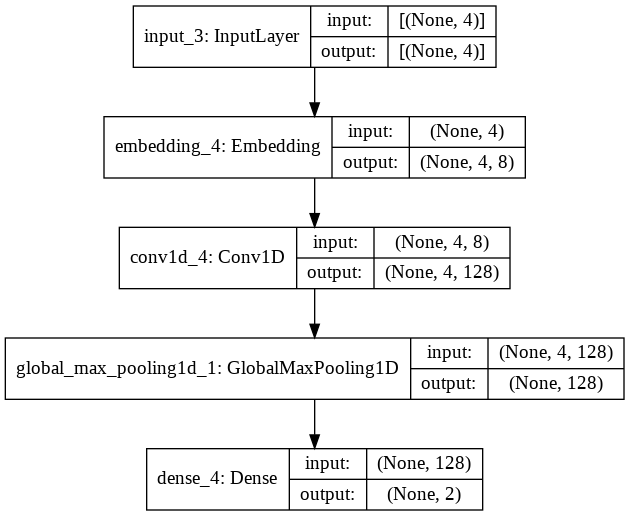

In [54]:
# 모델 생성
model = build_model(len(word_to_id), 8, 4, 2)
# 모델 내용 그래프 출력
tf.keras.utils.plot_model(model, 'model.png', show_shapes=True)

## 학습

In [55]:
# 모델 loss, optimizer, metric 정의
model.compile(loss='sparse_categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

In [56]:
# 모델 학습
history = model.fit(train_inputs, train_labels, epochs=20, batch_size=16)

Epoch 1/20
1/1 [==============================] - 0s 424ms/step - loss: 0.6932 - accuracy: 0.5000
Epoch 2/20
1/1 [==============================] - 0s 5ms/step - loss: 0.6906 - accuracy: 0.5000
Epoch 3/20
1/1 [==============================] - 0s 6ms/step - loss: 0.6880 - accuracy: 1.0000
Epoch 4/20
1/1 [==============================] - 0s 3ms/step - loss: 0.6855 - accuracy: 1.0000
Epoch 5/20
1/1 [==============================] - 0s 4ms/step - loss: 0.6831 - accuracy: 1.0000
Epoch 6/20
1/1 [==============================] - 0s 4ms/step - loss: 0.6806 - accuracy: 1.0000
Epoch 7/20
1/1 [==============================] - 0s 4ms/step - loss: 0.6781 - accuracy: 1.0000
Epoch 8/20
1/1 [==============================] - 0s 4ms/step - loss: 0.6758 - accuracy: 1.0000
Epoch 9/20
1/1 [==============================] - 0s 4ms/step - loss: 0.6733 - accuracy: 1.0000
Epoch 10/20
1/1 [==============================] - 0s 4ms/step - loss: 0.6708 - accuracy: 1.0000
Epoch 11/20
1/1 [====================

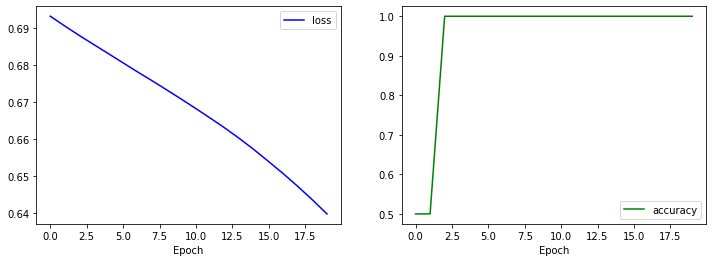

In [57]:
plt.figure(figsize=(12, 4))

plt.subplot(1, 2, 1)
plt.plot(history.history['loss'], 'b-', label='loss')
plt.xlabel('Epoch')
plt.legend()

plt.subplot(1, 2, 2)
plt.plot(history.history['accuracy'], 'g-', label='accuracy')
plt.xlabel('Epoch')
plt.legend()

plt.show()

## 평가

In [58]:
# 모델 평가
model.evaluate(train_inputs, train_labels)

1/1 [==============================] - 0s 95ms/step - loss: 0.6359 - accuracy: 1.0000


[0.6359084248542786, 1.0]

## 예측

In [59]:
# 추론할 입력
string = '나는 기분이 우울해'

In [60]:
# 입력을 숫자로 변경
infer_input = [word_to_id[word] for word in string.split()]
infer_input

[2, 4, 6]

In [61]:
# 문장의 길이를 모두 동일하게 변경 (최대길이 4)
infer_input += [0] * (4 - len(infer_input))
infer_input

[2, 4, 6, 0]

In [62]:
# numpy array 변환 (batch size 1 추가)
infer_inputs = np.array([infer_input])
infer_inputs

array([[2, 4, 6, 0]])

In [63]:
# 긍정/부정 추론
y_preds = model.predict(infer_inputs)
y_preds

array([[0.51466846, 0.48533154]], dtype=float32)

In [64]:
# 확률의 max 값을 추론 값으로 결정
y_pred_class = np.argmax(y_preds, axis=1)
y_pred_class

array([0])

In [65]:
# 각 예측 값에 대한 label string
for val in y_pred_class:
    print(val, ':', id_to_label[val])

0 : 부정
